# Setting Up Your Environment

Installing the qiskit_textbook Package 

The Qiskit Textbook provides some tools and widgets specific to the Textbook. This is not part of Qiskit and is available through the qiskit_textbook package. The quickest way to install this with Pip and Git is through the command:

### pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Alternatively, you can download the folder qiskit-textbook-src from the Github and run:

### pip install ./qiskit-textbook-src
from the directory that contains this folder.


https://qiskit.org/textbook/ch-prerequisites/setting-the-environment.html 

# Representing Qubit States

### Exploring Qubits with Qiskit 

First, we need to import all the tools we will need:

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In Qiskit, we use the QuantumCircuit object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state |0⟩. We can use the initialize() method to transform this into any state. We give initialize() the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

We can then use one of Qiskit’s simulators to view the resulting state of our qubit.

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use run to execute our circuit, giving the circuit and the backend as arguments. We then use .result() to get the result of this:

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

from result, we can then get the final statevector using .get_statevector():

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Let’s now measure our qubit as we would in a real quantum computer and see the result:

In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

This time, instead of the statevector we will get the counts for the 0 and 1 results using .get_counts():

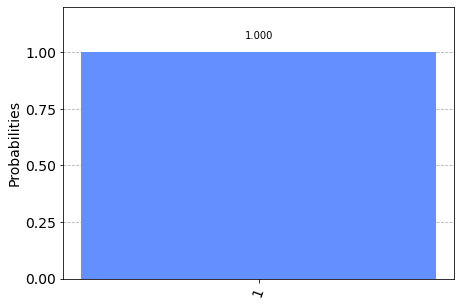

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


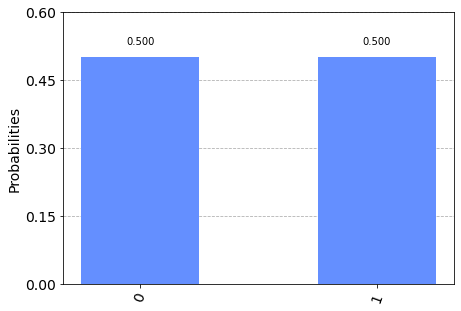

In [11]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

## Single Qubit Gates 
### 1. The Pauli Gates 
#### 1.1 The X-Gate 

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [13]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

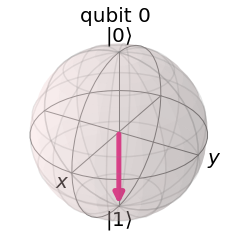

In [14]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

#### 1.2 The Y & Z-gates

In [15]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [16]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐ ░ ┌───┐┌───┐
q: ┤ X ├─░─┤ Y ├┤ Z ├
   └───┘ ░ └───┘└───┘

#### 3. The Hadamard Gate 

In [17]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [18]:
# Let's do an X-gate on a |0> qubit
qv = QuantumCircuit(1)
qv.h(0)
qv.draw()

┌───┐
q: ┤ H ├
   └───┘

In [19]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

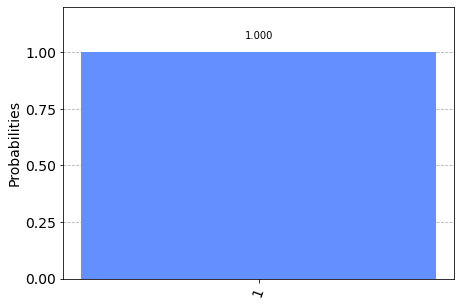

In [20]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

# Multiple Qubits and Entangled States

In [21]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [22]:
qc = QuantumCircuit(3)

# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
    
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [23]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Multi-Qubit Gates

In [24]:
qc = QuantumCircuit(2)

# Apply CNOT
qc.cx(0,1)

# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [25]:
qc = QuantumCircuit(2)

# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [26]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [27]:
qc = QuantumCircuit(2)

# Apply H-gate to the first:
qc.h(0)

# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [28]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

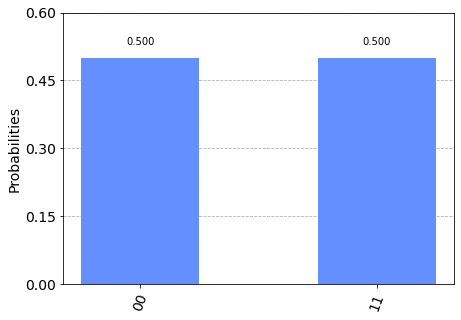

In [29]:
# Entangled States
plot_histogram(result.get_counts())

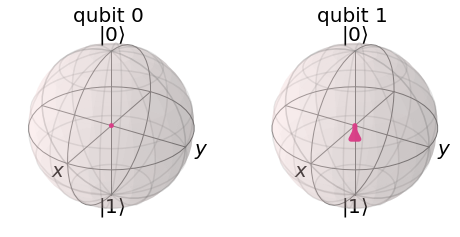

In [30]:
# Visualizing Entangled States 
plot_bloch_multivector(final_state)

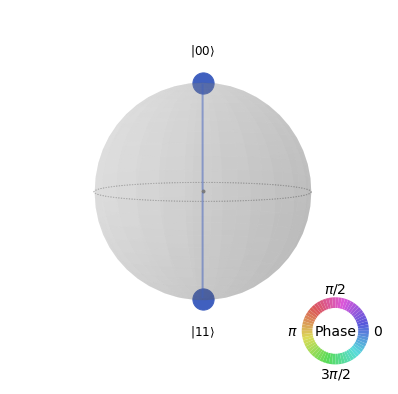

In [31]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)